In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [4]:
N = y.shape[0]

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # compute loss by MSE
    e = y - tx.dot(w)
    loss = 0.5 * np.mean(e.T.dot(e))
    # ***************************************************
    
    return loss

In [6]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)

def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))

# 2 Grid Search

Fill in the function `grid_search()` below:

Let us play with the grid search demo now!

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # compute loss for each combination of w0 and w1.
    for row, w00 in enumerate(w0):
        for col, w11 in enumerate(w1):
            w = np.array([w00,w11])
            losses[row, col] = compute_loss(y, tx, w)
    # ***************************************************
    return losses

### Spacing = 10 :

Grid Search: loss*=424244.8314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.013 seconds


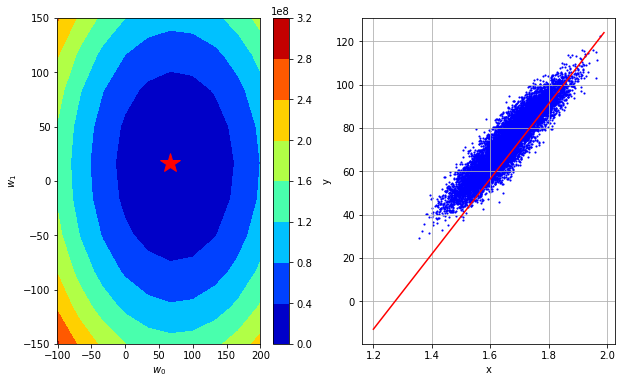

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Spacing = 50 :

Grid Search: loss*=187935.41019523234, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.241 seconds


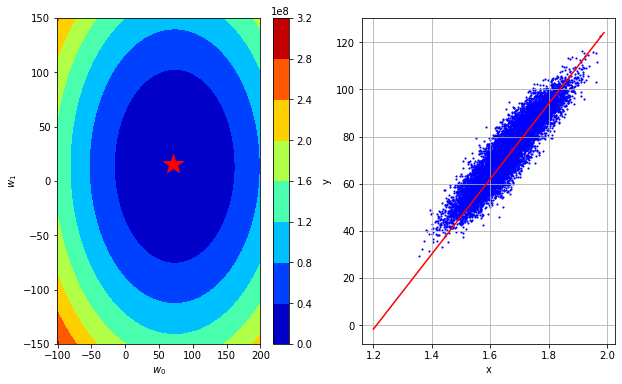

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Spacing = 25 :

Grid Search: loss*=173211.57163915868, w0*=75.0, w1*=12.5, execution time=0.066 seconds


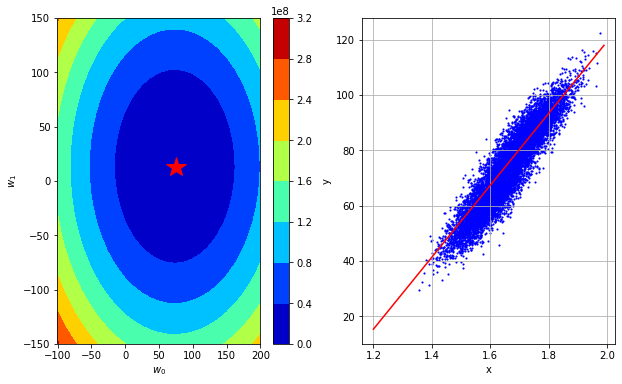

In [10]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=25)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [11]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y - tx.dot(w)
    gradient = - 1/len(e) * tx.T.dot(e)
    # ***************************************************
    return gradient, e

In [12]:
g0, e0 = compute_gradient(y, tx, np.array([100,20]))
g1, e1 = compute_gradient(y, tx, np.array([50,10]))
g2, e2 = compute_gradient(y, tx, np.array([70,12]))
print("|g0|=",np.linalg.norm(g0))
print("|g1|=",np.linalg.norm(g1))
print("|g2|=",np.linalg.norm(g2))

|g0|= 27.4905211292925
|g1|= 23.552392678247735
|g2|= 3.611020776209119


Please fill in the functions `gradient_descent` below:

In [13]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = []
    losses = []
    w = initial_w 
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient and loss
        g, err = compute_gradient(y, tx, w)
        loss = calculate_mse(err)
        # ***************************************************
        
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
        
        # ***************************************************
        # update w by gradient
        w = w - gamma * g
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # ***************************************************
        

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [16]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([-50, -50])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=9630.918434613872, w0=-50, w1=-50
Gradient Descent(1/49): loss=880.7838170758918, w0=36.305745401473416, w1=-5.564201295507701
Gradient Descent(2/49): loss=93.27170149746529, w0=62.19746902191565, w1=7.766538315839991
Gradient Descent(3/49): loss=22.39561109540668, w0=69.96498610804832, w1=11.765760199244312
Gradient Descent(4/49): loss=16.016762959221364, w0=72.29524123388812, w1=12.965526764265629
Gradient Descent(5/49): loss=15.442666626964675, w0=72.99431777164007, w1=13.325456733772022
Gradient Descent(6/49): loss=15.390997957061575, w0=73.20404073296565, w1=13.43343572462394
Gradient Descent(7/49): loss=15.386347776770295, w0=73.26695762136333, w1=13.465829421879516
Gradient Descent(8/49): loss=15.38592926054408, w0=73.28583268788263, w1=13.475547531056188
Gradient Descent(9/49): loss=15.38589159408372, w0=73.29149520783842, w1=13.478462963809191
Gradient Descent(10/49): loss=15.385888204102288, w0=73.29319396382516, w1=13.479337593635092
Gradient Des

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Trying different values of step sizes:

gamma = 0.001, 0.01, 0.5, 1, 2, 2.5

**Gamma = 1**

In [21]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1
# Initialization
w_initial = np.array([-50, -50])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=9630.918434613872, w0=-50, w1=-50
Gradient Descent(1/49): loss=15.3858878688294, w0=73.29392200210488, w1=13.479712434989004
Gradient Descent(2/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(3/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(4/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(5/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(6/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(7/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(8/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(9/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(10/49): loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(11/49): l

In [23]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

**Gamma = 0.5**

In [25]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([-50, -100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=14054.904056363317, w0=-50, w1=-100
Gradient Descent(1/49): loss=3525.2654299924607, w0=11.646961001052524, w1=-43.26014378250555
Gradient Descent(2/49): loss=892.8557733997384, w0=42.47044150157884, w1=-14.89021567375828
Gradient Descent(3/49): loss=234.75335925155707, w0=57.882181751841976, w1=-0.7052516193846046
Gradient Descent(4/49): loss=70.2277557145115, w0=65.58805187697357, w1=6.387230407802214
Gradient Descent(5/49): loss=29.096354830249968, w0=69.44098693953937, w1=9.933471421395627
Gradient Descent(6/49): loss=18.81350460918454, w0=71.36745447082228, w1=11.706591928192337
Gradient Descent(7/49): loss=16.242792053918176, w0=72.33068823646374, w1=12.593152181590694
Gradient Descent(8/49): loss=15.600113915101597, w0=72.81230511928446, w1=13.036432308289871
Gradient Descent(9/49): loss=15.439444380397449, w0=73.05311356069483, w1=13.25807237163946
Gradient Descent(10/49): loss=15.399276996721415, w0=73.17351778140001, w1=13.368892403314254
Gradient

**Gamma = 0.01**

In [38]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01

# Initialization
w_initial = np.array([60, 20])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=125.00714393307595, w0=60, w1=20
Gradient Descent(1/99): loss=122.82568093739748, w0=60.13293922002105, w1=19.934797124349892
Gradient Descent(2/99): loss=120.68762905533299, w0=60.26454904784189, w1=19.870246277456282
Gradient Descent(3/99): loss=118.59212440572153, w0=60.394842777384525, w1=19.80634093903161
Gradient Descent(4/99): loss=116.53832029863736, w0=60.523833569631734, w1=19.743074653991183
Gradient Descent(5/99): loss=114.5253868932842, w0=60.651534453956465, w1=19.680441031801163
Gradient Descent(6/99): loss=112.55251086269759, w0=60.77795832943795, w1=19.61843374583304
Gradient Descent(7/99): loss=110.61889506511963, w0=60.90311796616462, w1=19.557046532724602
Gradient Descent(8/99): loss=108.72375822191349, w0=61.027026006524025, w1=19.496273191747246
Gradient Descent(9/99): loss=106.8663346018871, w0=61.149694966479835, w1=19.436107584179663
Gradient Descent(10/99): loss=105.04587371189925, w0=61.27113723683609, w1=19.376543632687756
Gradie

In [39]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', min=1), Output()), _dom_classes=('widget-intera…

<function __main__.plot_figure(n_iter)>

**Gamma = 0.1**

In [40]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([50, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=4029.569369155007, w0=50, w1=100
Gradient Descent(1/49): loss=3266.874507710632, w0=52.32939220021053, w1=91.34797124349889
Gradient Descent(2/49): loss=2649.0916699406885, w0=54.42584518040001, w1=83.56114536264789
Gradient Descent(3/49): loss=2148.687571347035, w0=56.31265286257053, w1=76.553002069882
Gradient Descent(4/49): loss=1743.3602514861752, w0=58.01077977652401, w1=70.2456731063927
Gradient Descent(5/49): loss=1415.0451223988798, w0=59.53909399908214, w1=64.56907703925235
Gradient Descent(6/49): loss=1149.10986783817, w0=60.91457679938445, w1=59.460140578826014
Gradient Descent(7/49): loss=933.7023116439954, w0=62.152511319656526, w1=54.86209776444232
Gradient Descent(8/49): loss=759.2221911267137, w0=63.266652387901395, w1=50.72385923149699
Gradient Descent(9/49): loss=617.8932935077153, w0=64.26937934932178, w1=46.99944455184619
Gradient Descent(10/49): loss=503.41688643632716, w0=65.17183361460013, w1=43.64747134016048
Gradient Descent(11/49):

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [42]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    return compute_gradient(y, tx, w)

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    losses = []
    ws = []
    w = initial_w
    i=0
    print("Stochastic Gradient Descent: batch_size={bs}, max_iterations={mi}".format(
    bs=batch_size, mi=max_iters))
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
                #compute gradient and loss and update w
                g, err = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
                loss = calculate_mse(err)
                print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
                
                w = w - gamma * g
                #append ws and losses
                ws.append(w)
                losses.append(loss)
                
    # ***************************************************

    return losses, ws

**Batch size = 1**, `normal SGD`

In [43]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: batch_size=1, max_iterations=500
Stochastic Gradient Descent(0/499): loss=3980.8596800872565, w0=0, w1=0
Stochastic Gradient Descent(1/499): loss=2424.2092818332617, w0=8.922846720735773, w1=13.418937058225607
Stochastic Gradient Descent(2/499): loss=1525.9725639031337, w0=15.885905361639585, w1=22.1611441381237
Stochastic Gradient Descent(3/499): loss=1644.9209770970965, w0=21.41034662551982, w1=20.714685984452366
Stochastic Gradient Descent(4/499): loss=1210.7091757310327, w0=27.146061013627193, w1=13.62553506996936
Stochastic Gradient Descent(5/499): loss=928.0833989492281, w0=32.06685195763413, w1=8.422401561861193
Stochastic Gradient Descent(6/499): loss=606.1840771935911, w0=36.37517738394359, w1=4.375293449982568
Stochastic Gradient Descent(7/499): loss=770.700019119192, w0=39.85708512882596, w1=2.6280991329440466
Stochastic Gradient Descent(8/499): loss=458.28457222905894, w0=43.78315191154678, w1=6.717898009367481
Stochastic Gradient Descent(9/499)

In [44]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=500, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

**Batch size = 32**, `Mini-Batch SGD`

In [45]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.7
batch_size = 32

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: batch_size=32, max_iterations=100
Stochastic Gradient Descent(0/99): loss=2749.961874616727, w0=0, w1=0
Stochastic Gradient Descent(1/99): loss=396.8922539755334, w0=51.141586203282074, w1=3.5119948697264403
Stochastic Gradient Descent(2/99): loss=28.127960021210434, w0=69.09331661166362, w1=15.958058732927046
Stochastic Gradient Descent(3/99): loss=11.811173034625963, w0=71.65775340226367, w1=13.98329034901457
Stochastic Gradient Descent(4/99): loss=17.817407827714362, w0=72.78152980250547, w1=14.407489441476962
Stochastic Gradient Descent(5/99): loss=18.504494496566174, w0=74.14977095756635, w1=14.891768417950608
Stochastic Gradient Descent(6/99): loss=23.085328671818672, w0=73.06571464984873, w1=13.988643843003608
Stochastic Gradient Descent(7/99): loss=13.438493944816122, w0=72.60221884473273, w1=13.94820084349192
Stochastic Gradient Descent(8/99): loss=11.598832576879872, w0=72.18811580747138, w1=13.31309967740382
Stochastic Gradient Descent(9/99): los

In [46]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', min=1), Output()), _dom_classes=('widget-intera…

<function __main__.plot_figure(n_iter)>

**Batch size = N**, `full GD`

In [56]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = N

# Initialization
w_initial = np.array([150, 150])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: batch_size=10000, max_iterations=50
Stochastic Gradient Descent(0/49): loss=12276.191547195023, w0=150, w1=150
Stochastic Gradient Descent(1/49): loss=1118.8583972081933, w0=96.30574540147379, w1=54.43579870449241
Stochastic Gradient Descent(2/49): loss=114.69841370937219, w0=80.1974690219158, w1=25.766538315840045
Stochastic Gradient Descent(3/49): loss=24.324015194478225, w0=75.36498610804838, w1=17.165760199244332
Stochastic Gradient Descent(4/49): loss=16.1903193281378, w0=73.91524123388815, w1=14.585526764265634
Stochastic Gradient Descent(5/49): loss=15.458286700167156, w0=73.48031777164007, w1=13.811456733772026
Stochastic Gradient Descent(6/49): loss=15.3924037636498, w0=73.34984073296566, w1=13.579235724623942
Stochastic Gradient Descent(7/49): loss=15.386474299363236, w0=73.31069762136333, w1=13.509569421879517
Stochastic Gradient Descent(8/49): loss=15.385940647577446, w0=73.29895468788263, w1=13.488669531056189
Stochastic Gradient Descent(9/49):

In [57]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [58]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [59]:
x.shape

(200,)

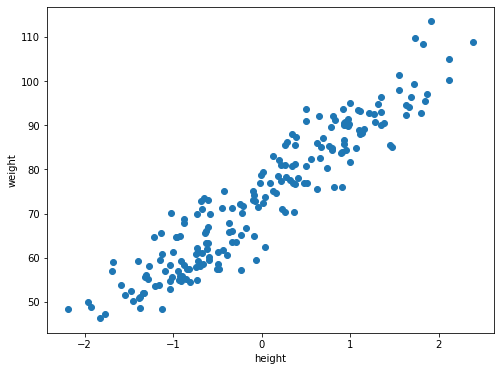

In [60]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

#### Fitting a linear regression model

We will use simple GD

In [61]:
# Define the parameters of the algorithm.
max_iters = 40
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/39): loss=2829.2722244384163, w0=0, w1=0
Gradient Descent(1/39): loss=267.05002587794155, w0=51.54259072181183, w1=10.132993413506076
Gradient Descent(2/39): loss=36.450028007500265, w0=67.00536793835533, w1=13.172891437557823
Gradient Descent(3/39): loss=15.696028199160635, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(4/39): loss=13.828168216410077, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(5/39): loss=13.660060817962522, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(6/39): loss=13.644931152102242, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(7/39): loss=13.643569482174817, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(8/39): loss=13.643446931881353, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(9/39): loss=13.643435902354941, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(10/39): loss=13.64343490969756, w0=73.63183766852546, w1=14.475619398847368
Gradient Des

In [62]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [63]:
height_1, weight_1, gender_1 = load_data(sub_sample=True, add_outlier=True)
x_1, mean_x_1, std_x_1 = standardize(height_1)
y_1, tx_1 = build_model_data(x_1, weight_1)

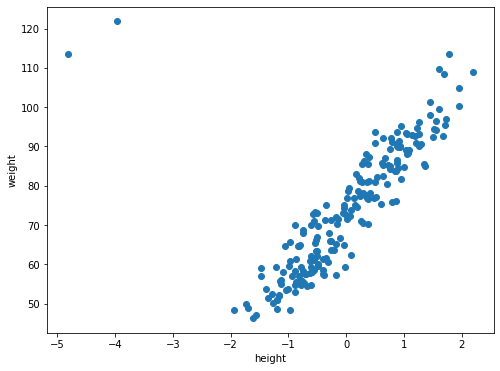

In [64]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x_1,y_1)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [102]:
# Define the parameters of the algorithm.
max_iters = 40
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(
    y_1, tx_1, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/39): loss=2869.8351145358524, w0=0, w1=0
Gradient Descent(1/39): loss=318.282124701595, w0=51.847464098448484, w1=7.724426406192441
Gradient Descent(2/39): loss=88.6423556165126, w0=67.401703327983, w1=10.041754328050121
Gradient Descent(3/39): loss=67.97477639885521, w0=72.06797509684336, w1=10.736952704607413
Gradient Descent(4/39): loss=66.11469426926604, w0=73.46785662750146, w1=10.945512217574594
Gradient Descent(5/39): loss=65.94728687760302, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(6/39): loss=65.93222021235334, w0=74.01381042445813, w1=11.026850427631796
Gradient Descent(7/39): loss=65.93086421248087, w0=74.05160722578589, w1=11.03248153448191
Gradient Descent(8/39): loss=65.93074217249236, w0=74.06294626618423, w1=11.034170866536943
Gradient Descent(9/39): loss=65.93073118889338, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(10/39): loss=65.93073020036948, w0=74.06736849193958, w1=11.034829706038407
Gradient Descent(11/39): 

In [65]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x_1, std_x_1, height_1, weight_1, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [67]:
def compute_subgradient(y, tx, w):
    """Compute the subgradient."""
    err = y - tx.dot(w)
    grad = -np.dot(tx.T,np.sign(err)) / len(err)
    return grad, err

In [69]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """SubGradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_subgradient(y, tx, w)
        loss = calculate_mae(err)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Sub Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [72]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = subgradient_descent(
    y_1, tx_1, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

Sub Gradient Descent(0/499): loss=74.06780585492638, w0=0.7, w1=8.756471895211877e-16
Sub Gradient Descent(1/499): loss=73.36780585492637, w0=1.4, w1=1.7512943790423754e-15
Sub Gradient Descent(2/499): loss=72.66780585492637, w0=2.0999999999999996, w1=2.626941568563563e-15
Sub Gradient Descent(3/499): loss=71.96780585492637, w0=2.8, w1=3.502588758084751e-15
Sub Gradient Descent(4/499): loss=71.26780585492638, w0=3.5, w1=4.378235947605939e-15
Sub Gradient Descent(5/499): loss=70.56780585492638, w0=4.2, w1=5.253883137127127e-15
Sub Gradient Descent(6/499): loss=69.86780585492637, w0=4.9, w1=6.1295303266483146e-15
Sub Gradient Descent(7/499): loss=69.16780585492639, w0=5.6000000000000005, w1=7.0051775161695025e-15
Sub Gradient Descent(8/499): loss=68.46780585492638, w0=6.300000000000001, w1=7.88082470569069e-15
Sub Gradient Descent(9/499): loss=67.76780585492638, w0=7.000000000000001, w1=8.756471895211878e-15
Sub Gradient Descent(10/499): loss=67.06780585492638, w0=7.700000000000001, w1=9

In [75]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x_1, std_x_1, height_1, weight_1, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

In [76]:
def stochastic_subgradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, err = compute_subgradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = calculate_mae(err)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD (subgradient) ({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [78]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_subgradient_descent(
    y_1, tx_1, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD (subgradient) : execution time={t:.3f} seconds".format(t=exection_time))

SGD (subgradient) (0/499): loss=86.2189907323464, w0=0.7, w1=0.2111643945662038
SGD (subgradient) (1/499): loss=91.37641263495799, w0=1.4, w1=1.2675656259450938
SGD (subgradient) (2/499): loss=56.60780209239091, w0=2.0999999999999996, w1=0.9823911313957994
SGD (subgradient) (3/499): loss=53.57457586604757, w0=2.8, w1=0.42426742764676006
SGD (subgradient) (4/499): loss=54.764998259697435, w0=3.5, w1=0.1527872456641809
SGD (subgradient) (5/499): loss=67.76640664822976, w0=4.2, w1=-0.030678533386238438
SGD (subgradient) (6/499): loss=60.53278907710892, w0=4.9, w1=-0.6149910709321298
SGD (subgradient) (7/499): loss=49.222348037633076, w0=5.6000000000000005, w1=-1.239807170743076
SGD (subgradient) (8/499): loss=54.629645079386144, w0=6.300000000000001, w1=-1.4570641749228261
SGD (subgradient) (9/499): loss=73.17666937113532, w0=7.000000000000001, w1=-1.4197768633049563
SGD (subgradient) (10/499): loss=52.386363123609456, w0=7.700000000000001, w1=-1.433532059280447
SGD (subgradient) (11/499)

In [79]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x_1, std_x_1, height_1, weight_1, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>